##The Sequential class

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(10, activation="softmax")
])

Incrementally building a Sequential model

In [6]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

Models that aren’t yet built have no weights

In [7]:
#model.weights

Calling a model for the first time to build it

In [8]:
model.build(input_shape=(None, 3))

Builds the model—now the model will expect samples of shape (3,). The
None in the input shape signals that the batch size could be anything.

In [9]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.28205872, -0.09422328,  0.16054684,  0.14269537, -0.05271719,
          0.08404756, -0.16133088, -0.22974257, -0.13577159,  0.21715713,
         -0.26362568,  0.28449667,  0.152244  , -0.10567461, -0.01544565,
          0.00209969, -0.1059448 ,  0.09090069,  0.1977832 , -0.13646287,
         -0.12267064,  0.00480267,  0.08738619,  0.13446671, -0.19142729,
         -0.28652322,  0.21134895, -0.00335455,  0.11575827, -0.11606978,
         -0.06874803, -0.22469546,  0.0936226 ,  0.15409046, -0.29513612,
         -0.24406728,  0.21129441, -0.0668011 ,  0.24450684,  0.24574274,
          0.16207075, -0.15319876, -0.21082759,  0.04993513,  0.07678053,
          0.06792498, -0.25419855, -0.05054723, -0.28398517, -0.05555725,
         -0.0048604 ,  0.02152795, -0.27381545,  0.18184504,  0.190494  ,
         -0.07619685, -0.0640837 , -0.2923147 , -0.12619619, -0.21027657,
         -0.08317198, -0.2361535 ,  0.15281

The summary() method

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Naming models and layers with the name argument

In [11]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Specifying the input shape of your model in advance.
Use Input to declare the shape
of the inputs. Note that the
shape argument must be the
shape of each sample, not
the shape of one batch.

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

use summary() to follow how the output shape of your model changes as
you add more layers:

In [13]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##The Functional API


In practice, it’s pretty common to encounter models
with multiple inputs (say, an image and its metadata), multiple outputs (different
things you want to predict about the data), or a nonlinear topology.
In such cases, you’d build your model using the Functional API.

he stack of two layers we used in the previous section. Its Functional API version looks like the following listing.

A simple Functional model with two Dense layers

In [15]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

We started by declaring an Input (note that you can also give names to these input
objects, like everything else)

In [16]:
inputs = keras.Input(shape=(3,), name="my_input")

In [17]:
inputs.shape

TensorShape([None, 3])

The model will process batches where each sample
has shape (3,). The number of samples per batch is
variable (indicated by the None batch size).

In [18]:
inputs.dtype

tf.float32

These batches will have
dtype float32.

We call such an object a symbolic tensor. It doesn’t contain any actual data, but it
encodes the specifications of the actual tensors of data that the model will see when
you use it. It stands for future tensors of data.

In [19]:
features = layers.Dense(64, activation="relu")(inputs)

All Keras layers can be called both on real tensors of data and on these symbolic tensors. In the latter case, they return a new symbolic tensor, with updated shape and
dtype information:

In [20]:
features.shape

TensorShape([None, 64])

After obtaining the final outputs, we instantiated the model by specifying its inputs
and outputs in the Model constructor:

In [21]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_12 (Dense)            (None, 64)                256       
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###MULTI-INPUT, MULTI-OUTPUT MODELS

Unlike this toy model, most deep learning models don’t look like lists—they look like
graphs. They may, for instance, have multiple inputs or multiple outputs. It’s for this
kind of model that the Functional API really shines.

Let’s say you’re building a system to rank customer support tickets by priority and
route them to the appropriate department. Your model has three inputs:
 The title of the ticket (text input)
 The text body of the ticket (text input)
 Any tags added by the user (categorical input, assumed here to be one-hot
encoded)
We can encode the text inputs as arrays of ones and zeros of size vocabulary_size
(see chapter 11 for detailed information about text encoding techniques).
Your model also has two outputs:
 The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
 The department that should handle the ticket (a softmax over the set of departments)

A multi-input, multi-output Functional model

In [23]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title") #Define model inputs.
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags]) #Combine input features into a single tensor, features, byconcatenating them.
features = layers.Dense(64, activation="relu")(features) #Apply an intermediate layer to recombine input features into richer representations.

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department]) #Create the model by specifying its inputs and outputs

####TRAINING A MULTI-INPUT, MULTI-OUTPUT MODEL

These lists of data should
be in the same order as the inputs you passed to the Model constructor.

In [24]:
import numpy as np
num_samples = 1280
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [25]:


model.compile(optimizer="rmsprop",
loss=["mean_squared_error", "categorical_crossentropy"],
metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit([title_data, text_body_data, tags_data],
[priority_data, department_data],
epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
[priority_data, department_data])

priority_preds, department_preds = model.predict(
[title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step


If you don’t want to rely on input order (for instance, because you have many inputs
or outputs), you can also leverage the names you gave to the Input objects and the
output layers, and pass data via dictionaries.

In [26]:
model.compile(optimizer="rmsprop",
loss={"priority": "mean_squared_error", "department":
"categorical_crossentropy"},
metrics={"priority": ["mean_absolute_error"], "department":
["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data,
"tags": tags_data},
{"priority": priority_data, "department": department_data},
epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data,
"tags": tags_data},
{"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
{"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


In [27]:
keras.utils.plot_model(model, "ticket_classifier.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
keras.utils.plot_model(
model, "ticket_classifier_with_shape_info.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Retrieving the inputs or outputs of a layer in a Functional model

In [29]:
model.layers

In [30]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [31]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

Let’s say you want to add another output to the previous model—you want to estimate how long a given issue ticket will take to resolve, a kind of difficulty rating. You
could do this via a classification layer over three categories: “quick,” “medium,” and
“difficult.” You don’t need to recreate and retrain a model from scratch. You can start
from the intermediate features of your previous model, since you have access to them,
like this.

Creating a new model by reusing intermediate layer outputs

In [32]:
features = model.layers[4].output #layers[4] is our intermediate Dense layer
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
inputs=[title, text_body, tags],
outputs=[priority, department, difficulty])

In [33]:
keras.utils.plot_model(
new_model, "updated_ticket_classifier.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


##Subclassing the Model class

 In the __init__() method, define the layers the model will use.
 In the call() method, define the forward pass of the model, reusing the layers
previously created.
 Instantiate your subclass, and call it on data to create its weights.

**REWRITING OUR PREVIOUS EXAMPLE AS A SUBCLASSED MODEL**

A simple subclassed model

In [34]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_classifier = layers.Dense(
      num_departments, activation="softmax")
  def call(self, inputs):
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

Once you’ve defined the model, you can instantiate it. Note that it will only create its
weights the first time you call it on some data, much like Layer subclasses:

In [35]:
model = CustomerTicketModel(num_departments=4)
priority, department = model(
  {"title": title_data, "text_body": text_body_data, "tags": tags_data})

a “layer” is a building block you use to create models, and a “model”
is the top-level object that you will actually train, export for inference, etc.

The structure of what you pass as the loss and
metrics arguments must match exactly what gets
returned by call()—here, a list of two elements.

The structure of the target
data must match exactly what is
returned by the call() method—
here, a list of two elements.

he structure of the input data must match
exactly what is expected by the call() method—
here, a dict with keys title, text_body, and tags.

In [36]:
model.compile(optimizer="rmsprop",
loss=["mean_squared_error", "categorical_crossentropy"],
metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit({"title": title_data,
"text_body": text_body_data,
"tags": tags_data},
[priority_data, department_data],
epochs=1)

model.evaluate({"title": title_data,
"text_body": text_body_data,
"tags": tags_data},
[priority_data, department_data])

priority_preds, department_preds = model.predict({"title": title_data,
"text_body": text_body_data,
"tags": tags_data})

40/40 [==============================] - 0s 5ms/step


 because the way layers are connected to each other is hidden inside
the body of the call() method, you cannot access that information. Calling summary() will not display layer connectivity, and you cannot plot the model topology via
plot_model(). Likewise, if you have a subclassed model, you cannot access the nodes
of the graph of layers to do feature extraction because there is simply no graph. Once
the model is instantiated, its forward pass becomes a complete black box.

**Mixing and matching different components**

Creating a Functional model that includes a subclassed model

In [37]:
class Classifier(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = "sigmoid"
    else:
      num_units = num_classes
      activation = "softmax"
    self.dense = layers.Dense(num_units, activation=activation)

  def call(self, inputs):
    return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

Creating a subclassed model that includes a Functional model

In [38]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation="relu")
    self.classifier = binary_classifier
    print("done")
  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)

model = MyModel()

done


##Using built-in training and evaluation loops

The standard workflow: compile(), fit(), evaluate(), predict()

In [39]:
from tensorflow.keras.datasets import mnist
def get_mnist_model():
  inputs = keras.Input(shape=(28 * 28,))
  features = layers.Dense(512, activation="relu")(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation="softmax")(features)
  model = keras.Model(inputs, outputs)
  return model
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels,
epochs=3,
validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2934 - accuracy: 0.9127 - val_loss: 0.1489 - val_accuracy: 0.9570
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1578 - accuracy: 0.9538 - val_loss: 0.1246 - val_accuracy: 0.9653
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


There are a couple of ways you can customize this simple workflow:
 Provide your own custom metrics.
 Pass callbacks to the fit() method to schedule actions to be taken at specific
points during training

**Writing your own metrics**

Implementing a custom metric by subclassing the Metric class

In [40]:
import tensorflow as tf
class RootMeanSquaredError(keras.metrics.Metric):
  def __init__(self, name="rmse", **kwargs):
    super().__init__(name=name, **kwargs)
    self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
    self.total_samples = self.add_weight(
      name="total_samples", initializer="zeros", dtype="int32")

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred))
    self.mse_sum.assign_add(mse)
    num_samples = tf.shape(y_pred)[0]
    self.total_samples.assign_add(num_samples)

  def result(self):
    return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

  def reset_state(self):
    self.mse_sum.assign(0.)
    self.total_samples.assign(0)

you also need to expose a way to reset the metric state without having to
reinstantiate it—this enables the same metric objects to be used across different
epochs of training or across both training and evaluation. You do this with the
reset_state() method:

In [41]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
epochs=3,
validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2941 - accuracy: 0.9132 - rmse: 7.1773 - val_loss: 0.1523 - val_accuracy: 0.9551 - val_rmse: 7.3520
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1622 - accuracy: 0.9537 - rmse: 7.3508 - val_loss: 0.1107 - val_accuracy: 0.9684 - val_rmse: 7.4021
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9715 - rmse: 7.4316


The keras.callbacks module includes a number of built-in callbacks (this is not an
exhaustive list):

keras.callbacks.ModelCheckpoint

keras.callbacks.EarlyStopping

keras.callbacks.LearningRateScheduler

keras.callbacks.ReduceLROnPlateau

keras.callbacks.CSVLogger


**THE EARLYSTOPPING AND MODELCHECKPOINT CALLBACKS**

A much better way to
handle this is to stop training when you measure that the validation loss is no longer
improving. This can be achieved using the EarlyStopping callback.

The EarlyStopping callback interrupts training once a target metric being monitored has stopped improving for a fixed number of epochs.

Using the callbacks argument in the fit() method

Callbacks are passed to the model via the
callbacks argument in fit(), which takes a list of
callbacks. You can pass any number of callbacks.

You monitor accuracy,
so it should be part of
the model’s metrics.

Note that because the callback
will monitor validation loss and
validation accuracy, you need to pass
validation_data to the call to fit()

In [42]:
callbacks_list = [
keras.callbacks.EarlyStopping(
monitor="val_accuracy",
patience=2,
),
keras.callbacks.ModelCheckpoint(
filepath="checkpoint_path.keras",
monitor="val_loss",
save_best_only=True,
)
]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels,
epochs=10,
callbacks=callbacks_list,
validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2966 - accuracy: 0.9102 - val_loss: 0.1495 - val_accuracy: 0.9567
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1600 - accuracy: 0.9543 - val_loss: 0.1134 - val_accuracy: 0.9687
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1300 - accuracy: 0.9627 - val_loss: 0.1127 - val_accuracy: 0.9696
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1146 - accuracy: 0.9683 - val_loss: 0.0961 - val_accuracy: 0.9749
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1048 - accuracy: 0.9701 - val_loss: 0.0867 - val_accuracy: 0.9759
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0938 - accuracy: 0.9743 - val_loss: 0.0936 - val_accuracy: 0.9767
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0872 - accuracy: 0.9761 - val_loss: 0.0969 - val_accuracy:

Note that you can always save models manually after training as well—just call
model.save('my_checkpoint_path'). To reload the model you’ve saved, just use

In [43]:
model = keras.models.load_model("checkpoint_path.keras")

**Writing your own callbacks**

You can then implement any number
of the following transparently named methods, which are called at various points
during training:

on_epoch_begin(epoch, logs)

on_epoch_end(epoch, logs)

on_batch_begin(batch, logs)

on_batch_end(batch, logs)

on_train_begin(logs)

on_train_end(logs)

a logs argument, which is a dictionary containing
information about the previous batch, epoch, or training run—training and validation metrics, and so on.

Here’s a simple example that saves a list of per-batch loss values during training
and saves a graph of these values at the end of each epoch.

Creating a custom callback by subclassing the Callback class

In [44]:
from matplotlib import pyplot as plt
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs):
    self.per_batch_losses = []
  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get("loss"))
  def on_epoch_end(self, epoch, logs):
    plt.clf()
    plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
    label="Training loss for each batch")
    plt.xlabel(f"Batch (epoch {epoch})")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"plot_at_epoch_{epoch}")
    self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2936 - accuracy: 0.9118 - val_loss: 0.1466 - val_accuracy: 0.9577
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1569 - accuracy: 0.9538 - val_loss: 0.1130 - val_accuracy: 0.9678
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1297 - accuracy: 0.9642 - val_loss: 0.0984 - val_accuracy: 0.9723
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1119 - accuracy: 0.9682 - val_loss: 0.0957 - val_accuracy: 0.9746
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1025 - accuracy: 0.9723 - val_loss: 0.0950 - val_accuracy: 0.9757
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0947 - accuracy: 0.9743 - val_loss: 0.0970 - val_accuracy: 0.9762
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0878 - accuracy: 0.9768 - val_loss: 0.0868 - val_accuracy:

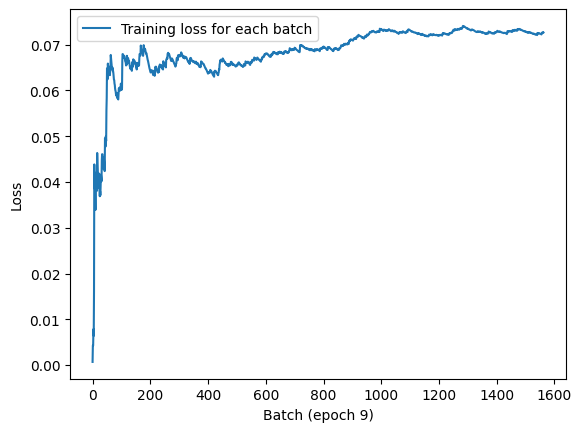

In [45]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels,
epochs=10,
callbacks=[LossHistory()],
validation_data=(val_images, val_labels))

###Monitoring and visualization with TensorBoard

The easiest way to use TensorBoard with a Keras model and the fit() method is to
use the keras.callbacks.TensorBoard callback.
In the simplest case, just specify where you want the callback to write logs, and
you’re good to go:

In [46]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
log_dir="/full_path_to_your_log_dir",
)

model.fit(train_images, train_labels,
epochs=10,
validation_data=(val_images, val_labels),
callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2919 - accuracy: 0.9136 - val_loss: 0.1405 - val_accuracy: 0.9589
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1577 - accuracy: 0.9556 - val_loss: 0.1049 - val_accuracy: 0.9700
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1280 - accuracy: 0.9638 - val_loss: 0.1073 - val_accuracy: 0.9729
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1147 - accuracy: 0.9672 - val_loss: 0.0960 - val_accuracy: 0.9745
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1004 - accuracy: 0.9720 - val_loss: 0.0898 - val_accuracy: 0.9752
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0909 - accuracy: 0.9746 - val_loss: 0.0878 - val_accuracy: 0.9784
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0839 - accuracy: 0.9775 - val_loss: 0.0865 - val_accuracy:

If you are running your script in a Colab notebook, you can run an embedded TensorBoard instance as part of your notebook, using the following commands:

%load_ext tensorboard

%tensorboard --logdir /full_path_to_your_log_dir

##Writing your own training and evaluation loops

The fit() workflow strikes a nice balance between ease of use and flexibility. It’s what
you will use most of the time. However, it isn’t meant to support everything a deep
learning researcher may want to do, even with custom metrics, custom losses, and custom callbacks.
After all, the built-in fit() workflow is solely focused on supervised learning: a setup
where there are known targets (also called labels or annotations) associated with your
input data, and where you compute your loss as a function of these targets and the
model’s predictions.

Whenever you find yourself in a situation where the built-in fit() is not enough,
you will need to write your own custom training logic. You already saw simple examples of low-level training loops in chapters 2 and 3. As a reminder, the contents of a
typical training loop look like this:
1 Run the forward pass (compute the model’s output) inside a gradient tape to
obtain a loss value for the current batch of data.
2 Retrieve the gradients of the loss with regard to the model’s weights.
3 Update the model’s weights so as to lower the loss value on the current batch
of data.

These steps are repeated for as many batches as necessary. This is essentially what
fit() does under the hood. In this section, you will learn to reimplement fit() from
scratch,

###Training versus inference

By extension, Functional and Sequential models also
expose this training argument in their call() methods. Remember to pass training
=True when you call a Keras model during the forward pass! Our forward pass thus
becomes predictions = model(inputs, training=True).

In addition, note that when you retrieve the gradients of the weights of your
model, you should not use tape.gradients(loss, model.weights), but rather tape
.gradients(loss, model.trainable_weights). Indeed, layers and models own two
kinds of weights:
 Trainable weights—These are meant to be updated via backpropagation to minimize the loss of the model, such as the kernel and bias of a Dense layer.
 Non-trainable weights—These are meant to be updated during the forward pass
by the layers that own them. For instance, if you wanted a custom layer to keep
a counter of how many batches it has processed so far, that information would
be stored in a non-trainable weight, and at each batch, your layer would increment the counter by one.

Among Keras built-in layers, the only layer that features non-trainable weights is the
BatchNormalization layer, which we will discuss in chapter 9. The BatchNormalization
layer needs non-trainable weights in order to track information about the mean and
standard deviation of the data that passes through it, so as to perform an online
approximation of feature normalization (a concept you learned about in chapter 6).
Taking into account these two details, a supervised-learning training step ends up
looking like this:

In [47]:
def train_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
    gradients = tape.gradients(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(model.trainable_weights, gradients))

###Low-level usage of metrics

In a low-level training loop, you will probably want to leverage Keras metrics (whether
custom ones or the built-in ones). You’ve already learned about the metrics API: simply call update_state(y_true, y_pred) for each batch of targets and predictions, and
then use result() to query the current metric value:

In [48]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


You may also need to track the average of a scalar value, such as the model’s loss. You
can do this via the keras.metrics.Mean metric:

In [49]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
  mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


Remember to use metric.reset_state() when you want to reset the current results
(at the start of a training epoch or at the start of evaluation).

###A complete training and evaluation loop

Writing a step-by-step training loop: the training step function

In [50]:
model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
  gradients = tape.gradient(loss, model.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs[metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs["loss"] = loss_tracking_metric.result()
  return logs

We will need to reset the state of our metrics at the start of each epoch and before running evaluation. Here’s a utility function to do it.

Writing a step-by-step training loop: resetting the metrics

In [51]:
def reset_metrics():
  for metric in metrics:
    metric.reset_state()
  loss_tracking_metric.reset_state()

We can now lay out our complete training loop. Note that we use a tf.data.Dataset
object to turn our NumPy data into an iterator that iterates over the data in batches of
size 32.

Writing a step-by-step training loop: the loop itself

tf.data.Dataset.from_tensor_slices(): This line creates a TensorFlow Dataset object from your training data, train_images and train_labels. A Dataset is a way to efficiently feed data to your model during training. It takes the train_images (input data) and train_labels (target data) and creates a paired dataset.

.batch(32): This divides the dataset into batches of 32 samples each. Training in batches is more efficient than processing individual samples.

In [52]:
training_dataset = tf.data.Dataset.from_tensor_slices(
(train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3

for epoch in range(epochs):
  reset_metrics()
  for inputs_batch, targets_batch in training_dataset:
    logs = train_step(inputs_batch, targets_batch)
  print(f"Results at the end of epoch {epoch}")
  for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9143
...loss: 0.2869
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9548
...loss: 0.1577
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9638
...loss: 0.1283


And here’s the evaluation loop: a simple for loop that repeatedly calls a test_step()
function, which processes a single batch of data. The test_step() function is just a subset of the logic of train_step(). It omits the code that deals with updating the weights
of the model—that is to say, everything involving the GradientTape and the optimizer.

Writing a step-by-step evaluation loop

In [53]:
def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)

  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs["val_" + metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs["val_loss"] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()

for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
  print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9703
...val_loss: 0.1122


###Make it fast with tf.function

It’s more performant to compile your TensorFlow code into a computation graph that
can be globally optimized in a way that code interpreted line by line cannot. The syntax to do this is very simple: just add a @tf.function to any function you want to compile before executing, as shown in the following listing.

Adding a @tf.function decorator to our evaluation-step function

In [54]:
@tf.function
def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)
  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs["val_" + metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs["val_loss"] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()

for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
  print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9703
...val_loss: 0.1122


Remember, while you are debugging your code, prefer running it eagerly, without
any @tf.function decorator. It’s easier to track bugs this way. Once your code is working and you want to make it fast, add a @tf.function decorator to your training step
and your evaluation step—or any other performance-critical function

###Leveraging fit() with a custom training loop

e were writing our own training loop entirely from scratch.
Doing so provides you with the most flexibility, but you end up writing a lot of code
while simultaneously missing out on many convenient features of fit(), such as callbacks or built-in support for distributed training.

What if you need a custom training algorithm, but you still want to leverage the
power of the built-in Keras training logic? There’s actually a middle ground between
fit() and a training loop written from scratch: you can provide a custom training
step function and let the framework do the rest.
You can do this by overriding the train_step() method of the Model class. This is
the function that is called by fit() for every batch of data. You will then be able to call
fit() as usual, and it will be running your own learning algorithm under the hood.
Here’s a simple example:
 We create a new class that subclasses keras.Model.
 We override the method train_step(self, data). Its contents are nearly identical to what we used in the previous section. It returns a dictionary mapping
metric names (including the loss) to their current values.
 We implement a metrics property that tracks the model’s Metric instances.
This enables the model to automatically call reset_state() on the model’s
metrics at the start of each epoch and at the start of a call to evaluate(), so you
don’t have to do it by hand.

Implementing a custom training step to use with fit()

In [62]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")
class CustomModel(keras.Model):

  def train_step(self, data):
    inputs, targets = data
    with tf.GradientTape() as tape:
      predictions = self(inputs, training=True)
      loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    loss_tracker.update_state(loss)
    return {"loss": loss_tracker.result()}
  @property
  def metrics(self):
    return [loss_tracker]

We can now instantiate our custom model, compile it (we only pass the optimizer, since
the loss is already defined outside of the model), and train it using fit() as usual:

In [65]:
'''inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)'''

'inputs = keras.Input(shape=(28 * 28,))\nfeatures = layers.Dense(512, activation="relu")(inputs)\nfeatures = layers.Dropout(0.5)(features)\noutputs = layers.Dense(10, activation="softmax")(features)\nmodel = CustomModel(inputs, outputs)\nmodel.compile(optimizer=keras.optimizers.RMSprop())\nmodel.fit(train_images, train_labels, epochs=3)'

In [66]:
class CustomModel(keras.Model):
  def train_step(self, data):
    inputs, targets = data
    with tf.GradientTape() as tape:
      predictions = self(inputs, training=True)
      loss = self.compiled_loss(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    self.compiled_metrics.update_state(targets, predictions)
    return {m.name: m.result() for m in self.metrics}

In [67]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=keras.optimizers.RMSprop(),
loss=keras.losses.SparseCategoricalCrossentropy(),
metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


KeyError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "<ipython-input-66-542f52ce2b65>", line 8, in train_step
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable dense_42/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.RMSprop.'
